diabetes dataset https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database This data frame contains following columns:
 1.Pregnancies: This column typically represents the number of times a person has been pregnant. It's a numeric (integer) attribute.

2.Glucose: This column represents the glucose concentration in the blood, often measured in milligrams per deciliter (mg/dL). It's a numeric (continuous) attribute and is an important indicator in diabetes diagnosis.

3.BloodPressure: This column represents the blood pressure of the individual. It's also a numeric (continuous) attribute and is typically measured in millimeters of mercury (mm Hg).

4.SkinThickness: This column represents the thickness of the skinfold at a certain location on the body. It's another numeric (continuous) attribute, which might be used in body composition measurements.

5.Insulin: This column represents the insulin level in the blood, typically measured in microunits per milliliter (µU/mL). It's a numeric (continuous) attribute and is related to glucose metabolism.

6.BMI (Body Mass Index): BMI is a measure of body fat based on an individual's weight in relation to their height. It's a numeric (continuous) attribute, and it's calculated as weight in kilograms divided by the square of height in meters.

7.DiabetesPedigreeFunction: This column is a numeric (continuous) attribute that represents a function designed to measure the likelihood of diabetes based on family hitory. It often accounts for the genetic component of diabetes risk.

8.Age: Age is a numeric (integer) attribute that represents the age of the individual.

9.Outcome: This column is a binary (categorical) attribute that typically represents the target variable or the label in a diabetes prediction task. It often takes two values, such as 0 for "No Diabetes" and 1 for "Diabetes," indicating the presence or absence of diabetes in the individual.

In [32]:
#creating virtual drive
from google.colab import drive
drive.mount("/content/decision-tree")

Drive already mounted at /content/decision-tree; to attempt to forcibly remount, call drive.mount("/content/decision-tree", force_remount=True).


In [33]:
#loading the dataset
import pandas as pd
mydata=pd.read_csv("/content/decision-tree/MyDrive/Share diabetes.csv")
mydata.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming you have loaded your dataset into 'mydata'
# If you haven't loaded the data yet, you need to do so.

# Assuming 'mydata' contains both features and target variable
# If not, you need to define 'x' which contains features and 'y' which contains the target variable.

# Assuming you have defined 'mydata' and 'Outcome'
x = mydata.drop('Outcome', axis=1)  # Assuming 'Outcome' is your target variable, dropping it to get features
y = mydata['Outcome']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)  # You can choose 'gini' as well

# Training the model on the training data
tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
#making prediction on the testing set
y_pred=tree.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0]


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have made predictions 'y_pred' using the trained model 'tree'

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
[[76 23]
 [20 35]]


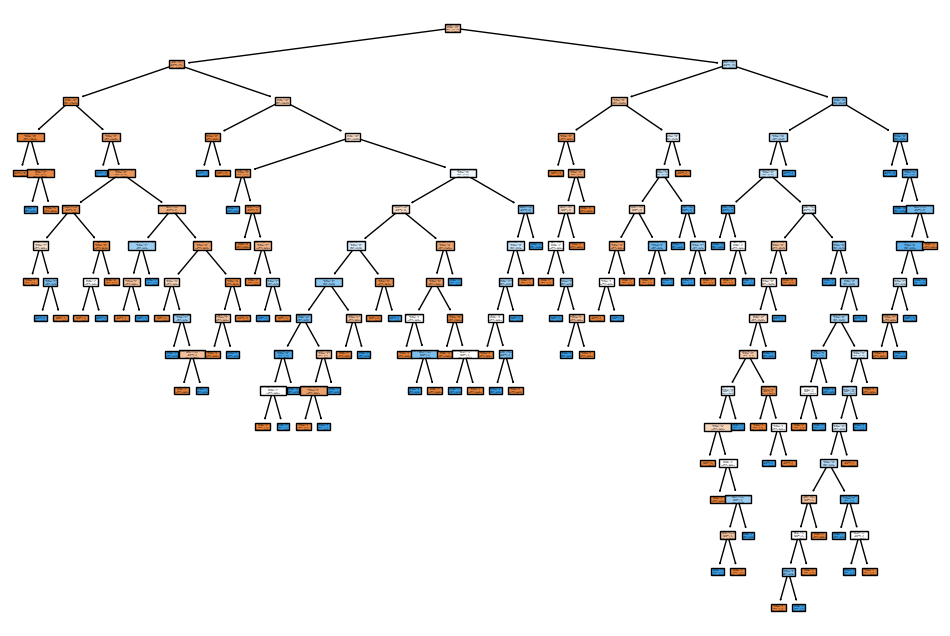

In [37]:
#Step 6: Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(tree,filled=True,feature_names=x.columns,class_names=["No diabetes","Diabetes"])
plt.show()

In [38]:
#save the model
import joblib
tree=DecisionTreeClassifier(criterion="entropy",random_state=42)
tree.fit(x_train,y_train)
#save the trained model to a file
joblib.dump(tree,"Decision_tree_model")


['Decision_tree_model']

In [39]:
#step8 load the model and make a prediction using mydata
import joblib
import pandas as pd
#loading the saved model
loaded_model = joblib.load("Decision_tree_model")
#prepare your data with attribute names
new_data=pd.DataFrame({
    "Pregnancies":[2,4,1,5],
    "Glucose":[100,150,95,130],
    "BloodPressure":[70,80,60,90],
    "SkinThickness":[32,35,25,40],
    "Insulin":[45,50,40,60],
    "BMI":[32.0,35.5,29.0,40.2],
    "DiabetesPedigreeFunction":[0.4,0.5,0.3,0.6],
    "Age":[30,35,28,40]
})

In [40]:

# Making predictions using the loaded model on new data
predictions = loaded_model.predict(new_data)

# Mapping prediction values to human-readable labels
diabetes_mapping = {0: "0-Not Diabetic", 1: "1-Diabetic"}

# Printing predictions with labels
for i, prediction in enumerate(predictions):
    # Mapping prediction to label
    label = diabetes_mapping[prediction]

    # Printing result for each data point
    print(f"Data{i+1}: Predicted Outcome - {label}")

Data1: Predicted Outcome - 0-Not Diabetic
Data2: Predicted Outcome - 1-Diabetic
Data3: Predicted Outcome - 0-Not Diabetic
Data4: Predicted Outcome - 1-Diabetic
